In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df_train=pd.read_csv('train.csv')
df_train

,game_id,nickname,score,rating
0,1,BetterBot,335,1637
1,1,stevy,429,1500
2,3,davidavid,440,1811
3,3,BetterBot,318,2071
4,4,Inandoutworker,119,1473
...,...,...,...,...
100815,72771,HastyBot,393,1614
100816,72772,BetterBot,442,1674
100817,72772,Gtowngrad,388,1364
100818,72773,adola,383,2075


In [4]:
df_test=pd.read_csv('test.csv')
df_test

,game_id,nickname,score,rating
0,2,Super,488,NaN
1,2,BetterBot,401,2000.0
2,7,STEEBot,377,2082.0
3,7,Priya1,379,NaN
4,11,STEEBot,334,1829.0
...,...,...,...,...
44721,72762,kyjo55555,367,NaN
44722,72768,HastyBot,524,2356.0
44723,72768,Maximilian,357,NaN
44724,72769,STEEBot,626,2110.0


In [5]:
df_games=pd.read_csv('games.csv')
df_games

,game_id,first,time_control_name,game_end_reason,winner,created_at,lexicon,initial_time_seconds,increment_seconds,rating_mode,max_overtime_minutes,game_duration_seconds
0,1,BetterBot,regular,STANDARD,1,2022-08-26 03:38:49,NWL20,1200,0,CASUAL,1,674.844274
1,2,Super,regular,STANDARD,1,2022-08-10 19:19:59,CSW21,3600,0,RATED,1,364.214418
2,3,BetterBot,regular,STANDARD,1,2022-09-04 08:04:27,CSW21,900,0,RATED,5,492.268262
3,4,BetterBot,regular,RESIGNED,0,2022-09-12 02:36:19,CSW21,3600,0,CASUAL,1,350.861141
4,5,STEEBot,regular,STANDARD,0,2022-09-06 04:31:36,NWL20,1200,0,CASUAL,1,642.688722
...,...,...,...,...,...,...,...,...,...,...,...,...
72768,72769,browndav,blitz,STANDARD,0,2022-09-07 13:24:13,CSW21,180,0,RATED,1,218.043751
72769,72770,HastyBot,regular,TIME,0,2022-09-04 00:13:24,CSW21,3600,0,RATED,1,3662.659287
72770,72771,HastyBot,regular,STANDARD,0,2022-09-19 03:28:44,ECWL,900,0,CASUAL,10,236.133634
72771,72772,Gtowngrad,regular,STANDARD,0,2022-08-31 15:57:38,NWL20,900,0,RATED,1,681.370077


In [6]:
df_turns=pd.read_csv('turns.csv')
df_turns

,game_id,turn_number,nickname,rack,location,move,points,score,turn_type
0,1,1,BetterBot,DDEGITT,8G,DIG,10,10,Play
1,1,2,stevy,AEHOPUX,7H,HAP,18,18,Play
2,1,3,BetterBot,DEELTTU,6I,LUTE,16,26,Play
3,1,4,stevy,EMORSUX,5K,UM,16,34,Play
4,1,5,BetterBot,ACDEITU,L5,..DICATE,28,54,Play
...,...,...,...,...,...,...,...,...,...
2005493,72773,22,adola,ABINRRU,15N,IN,18,376,Play
2005494,72773,23,HastyBot,EGHIIP,H12,.HIG,24,331,Play
2005495,72773,24,adola,ABRRU,15E,BRA.,7,383,Play
2005496,72773,25,HastyBot,EIP,7A,PIE,11,342,Play


In [7]:
dftrainmerge=pd.merge(df_train,df_games,on='game_id')
dftrainmerge

,game_id,nickname,score,rating,first,time_control_name,game_end_reason,winner,created_at,lexicon,initial_time_seconds,increment_seconds,rating_mode,max_overtime_minutes,game_duration_seconds
0,1,BetterBot,335,1637,BetterBot,regular,STANDARD,1,2022-08-26 03:38:49,NWL20,1200,0,CASUAL,1,674.844274
1,1,stevy,429,1500,BetterBot,regular,STANDARD,1,2022-08-26 03:38:49,NWL20,1200,0,CASUAL,1,674.844274
2,3,davidavid,440,1811,BetterBot,regular,STANDARD,1,2022-09-04 08:04:27,CSW21,900,0,RATED,5,492.268262
3,3,BetterBot,318,2071,BetterBot,regular,STANDARD,1,2022-09-04 08:04:27,CSW21,900,0,RATED,5,492.268262
4,4,Inandoutworker,119,1473,BetterBot,regular,RESIGNED,0,2022-09-12 02:36:19,CSW21,3600,0,CASUAL,1,350.861141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100815,72771,HastyBot,393,1614,HastyBot,regular,STANDARD,0,2022-09-19 03:28:44,ECWL,900,0,CASUAL,10,236.133634
100816,72772,BetterBot,442,1674,Gtowngrad,regular,STANDARD,0,2022-08-31 15:57:38,NWL20,900,0,RATED,1,681.370077
100817,72772,Gtowngrad,388,1364,Gtowngrad,regular,STANDARD,0,2022-08-31 15:57:38,NWL20,900,0,RATED,1,681.370077
100818,72773,adola,383,2075,HastyBot,regular,STANDARD,1,2022-08-27 09:13:08,CSW21,1200,0,RATED,1,719.720262


In [8]:
df_train_total=pd.merge(dftrainmerge,df_turns,on='game_id')
df_train_total

,game_id,nickname_x,score_x,rating,first,time_control_name,game_end_reason,winner,created_at,lexicon,...,max_overtime_minutes,game_duration_seconds,turn_number,nickname_y,rack,location,move,points,score_y,turn_type
0,1,BetterBot,335,1637,BetterBot,regular,STANDARD,1,2022-08-26 03:38:49,NWL20,...,1,674.844274,1,BetterBot,DDEGITT,8G,DIG,10,10,Play
1,1,BetterBot,335,1637,BetterBot,regular,STANDARD,1,2022-08-26 03:38:49,NWL20,...,1,674.844274,2,stevy,AEHOPUX,7H,HAP,18,18,Play
2,1,BetterBot,335,1637,BetterBot,regular,STANDARD,1,2022-08-26 03:38:49,NWL20,...,1,674.844274,3,BetterBot,DEELTTU,6I,LUTE,16,26,Play
3,1,BetterBot,335,1637,BetterBot,regular,STANDARD,1,2022-08-26 03:38:49,NWL20,...,1,674.844274,4,stevy,EMORSUX,5K,UM,16,34,Play
4,1,BetterBot,335,1637,BetterBot,regular,STANDARD,1,2022-08-26 03:38:49,NWL20,...,1,674.844274,5,BetterBot,ACDEITU,L5,..DICATE,28,54,Play
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2782573,72773,HastyBot,346,2302,HastyBot,regular,STANDARD,1,2022-08-27 09:13:08,CSW21,...,1,719.720262,22,adola,ABINRRU,15N,IN,18,376,Play
2782574,72773,HastyBot,346,2302,HastyBot,regular,STANDARD,1,2022-08-27 09:13:08,CSW21,...,1,719.720262,23,HastyBot,EGHIIP,H12,.HIG,24,331,Play
2782575,72773,HastyBot,346,2302,HastyBot,regular,STANDARD,1,2022-08-27 09:13:08,CSW21,...,1,719.720262,24,adola,ABRRU,15E,BRA.,7,383,Play
2782576,72773,HastyBot,346,2302,HastyBot,regular,STANDARD,1,2022-08-27 09:13:08,CSW21,...,1,719.720262,25,HastyBot,EIP,7A,PIE,11,342,Play


In [9]:
df_train_total.isnull().sum()

game_id                       0
nickname_x                    0
score_x                       0
rating                        0
first                         0
time_control_name             0
game_end_reason               0
winner                        0
created_at                    0
lexicon                       0
initial_time_seconds          0
increment_seconds             0
rating_mode                   0
max_overtime_minutes          0
game_duration_seconds         0
turn_number                   0
nickname_y                    0
rack                      96414
location                 177060
move                        590
points                        0
score_y                       0
turn_type                   506
dtype: int64

<AxesSubplot:>

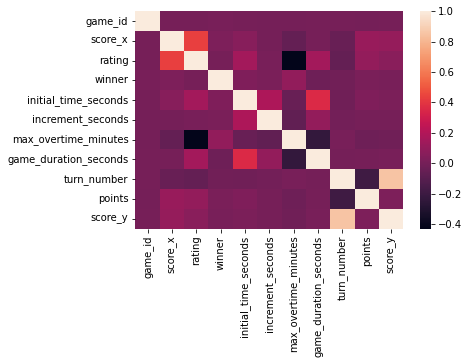

In [10]:
sns.heatmap(df_train_total.corr())

In [11]:
df_train_total.nunique()

game_id                   50410
nickname_x                 1031
score_x                     730
rating                     1204
first                       915
time_control_name             4
game_end_reason               4
winner                        3
created_at                50125
lexicon                       4
initial_time_seconds         34
increment_seconds            10
rating_mode                   2
max_overtime_minutes          8
game_duration_seconds     50409
turn_number                  69
nickname_y                 1031
rack                     507130
location                    418
move                     279088
points                      306
score_y                     868
turn_type                     7
dtype: int64

In [12]:
dftestmerge=pd.merge(df_test,df_games,on='game_id')
dftestmerge

,game_id,nickname,score,rating,first,time_control_name,game_end_reason,winner,created_at,lexicon,initial_time_seconds,increment_seconds,rating_mode,max_overtime_minutes,game_duration_seconds
0,2,Super,488,NaN,Super,regular,STANDARD,1,2022-08-10 19:19:59,CSW21,3600,0,RATED,1,364.214418
1,2,BetterBot,401,2000.0,Super,regular,STANDARD,1,2022-08-10 19:19:59,CSW21,3600,0,RATED,1,364.214418
2,7,STEEBot,377,2082.0,Priya1,regular,STANDARD,1,2022-08-26 03:07:48,CSW21,1260,0,RATED,1,385.599607
3,7,Priya1,379,NaN,Priya1,regular,STANDARD,1,2022-08-26 03:07:48,CSW21,1260,0,RATED,1,385.599607
4,11,STEEBot,334,1829.0,TileRunner,regular,STANDARD,1,2022-08-22 01:13:10,NWL20,1200,0,CASUAL,1,501.739156
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44721,72762,kyjo55555,367,NaN,kyjo55555,regular,STANDARD,1,2022-08-24 11:16:15,NWL20,3600,0,CASUAL,1,386.086637
44722,72768,HastyBot,524,2356.0,HastyBot,regular,STANDARD,0,2022-09-03 07:33:04,CSW21,3600,0,RATED,1,2155.922543
44723,72768,Maximilian,357,NaN,HastyBot,regular,STANDARD,0,2022-09-03 07:33:04,CSW21,3600,0,RATED,1,2155.922543
44724,72769,STEEBot,626,2110.0,browndav,blitz,STANDARD,0,2022-09-07 13:24:13,CSW21,180,0,RATED,1,218.043751


In [13]:
df_test_total=pd.merge(dftestmerge,df_turns,on='game_id')
df_test_total

,game_id,nickname_x,score_x,rating,first,time_control_name,game_end_reason,winner,created_at,lexicon,...,max_overtime_minutes,game_duration_seconds,turn_number,nickname_y,rack,location,move,points,score_y,turn_type
0,2,Super,488,NaN,Super,regular,STANDARD,1,2022-08-10 19:19:59,CSW21,...,1,364.214418,1,Super,AFINRTV,8D,FAINT,24,24,Play
1,2,Super,488,NaN,Super,regular,STANDARD,1,2022-08-10 19:19:59,CSW21,...,1,364.214418,2,BetterBot,EEEEGIT,G6,GE.IE,8,8,Play
2,2,Super,488,NaN,Super,regular,STANDARD,1,2022-08-10 19:19:59,CSW21,...,1,364.214418,3,Super,AAERTVW,F10,WAVER,34,58,Play
3,2,Super,488,NaN,Super,regular,STANDARD,1,2022-08-10 19:19:59,CSW21,...,1,364.214418,4,BetterBot,EEHNNOT,14B,ENTH.ONE,72,80,Play
4,2,Super,488,NaN,Super,regular,STANDARD,1,2022-08-10 19:19:59,CSW21,...,1,364.214418,5,Super,AABEFTY,15G,FY,44,102,Play
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1228413,72769,browndav,384,NaN,browndav,blitz,STANDARD,0,2022-09-07 13:24:13,CSW21,...,1,218.043751,27,browndav,OORTVWY,D2,VOW,32,367,Play
1228414,72769,browndav,384,NaN,browndav,blitz,STANDARD,0,2022-09-07 13:24:13,CSW21,...,1,218.043751,28,STEEBot,ACILSTZ,1A,ZILAS,56,626,Play
1228415,72769,browndav,384,NaN,browndav,blitz,STANDARD,0,2022-09-07 13:24:13,CSW21,...,1,218.043751,29,browndav,ORTY,B5,TYRO,19,386,Play
1228416,72769,browndav,384,NaN,browndav,blitz,STANDARD,0,2022-09-07 13:24:13,CSW21,...,1,218.043751,30,browndav,NaN,NaN,(CT),8,394,End


In [14]:
df_test_total[df_test_total['rating'].isnull()==False]

,game_id,nickname_x,score_x,rating,first,time_control_name,game_end_reason,winner,created_at,lexicon,...,max_overtime_minutes,game_duration_seconds,turn_number,nickname_y,rack,location,move,points,score_y,turn_type
26,2,BetterBot,401,2000.0,Super,regular,STANDARD,1,2022-08-10 19:19:59,CSW21,...,1,364.214418,1,Super,AFINRTV,8D,FAINT,24,24,Play
27,2,BetterBot,401,2000.0,Super,regular,STANDARD,1,2022-08-10 19:19:59,CSW21,...,1,364.214418,2,BetterBot,EEEEGIT,G6,GE.IE,8,8,Play
28,2,BetterBot,401,2000.0,Super,regular,STANDARD,1,2022-08-10 19:19:59,CSW21,...,1,364.214418,3,Super,AAERTVW,F10,WAVER,34,58,Play
29,2,BetterBot,401,2000.0,Super,regular,STANDARD,1,2022-08-10 19:19:59,CSW21,...,1,364.214418,4,BetterBot,EEHNNOT,14B,ENTH.ONE,72,80,Play
30,2,BetterBot,401,2000.0,Super,regular,STANDARD,1,2022-08-10 19:19:59,CSW21,...,1,364.214418,5,Super,AABEFTY,15G,FY,44,102,Play
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1228382,72769,STEEBot,626,2110.0,browndav,blitz,STANDARD,0,2022-09-07 13:24:13,CSW21,...,1,218.043751,27,browndav,OORTVWY,D2,VOW,32,367,Play
1228383,72769,STEEBot,626,2110.0,browndav,blitz,STANDARD,0,2022-09-07 13:24:13,CSW21,...,1,218.043751,28,STEEBot,ACILSTZ,1A,ZILAS,56,626,Play
1228384,72769,STEEBot,626,2110.0,browndav,blitz,STANDARD,0,2022-09-07 13:24:13,CSW21,...,1,218.043751,29,browndav,ORTY,B5,TYRO,19,386,Play
1228385,72769,STEEBot,626,2110.0,browndav,blitz,STANDARD,0,2022-09-07 13:24:13,CSW21,...,1,218.043751,30,browndav,NaN,NaN,(CT),8,394,End


In [15]:
df_test_total.isnull().sum()

game_id                       0
nickname_x                    0
score_x                       0
rating                   614209
first                         0
time_control_name             0
game_end_reason               0
winner                        0
created_at                    0
lexicon                       0
initial_time_seconds          0
increment_seconds             0
rating_mode                   0
max_overtime_minutes          0
game_duration_seconds         0
turn_number                   0
nickname_y                    0
rack                      42366
location                  87418
move                        318
points                        0
score_y                       0
turn_type                   284
dtype: int64

In [16]:
df_test_total.nunique()

game_id                   22363
nickname_x                  443
score_x                     665
rating                      780
first                       402
time_control_name             4
game_end_reason               4
winner                        3
created_at                22310
lexicon                       3
initial_time_seconds         32
increment_seconds             9
rating_mode                   2
max_overtime_minutes          7
game_duration_seconds     22363
turn_number                  75
nickname_y                  443
rack                     296397
location                    418
move                     163325
points                      291
score_y                     881
turn_type                     7
dtype: int64

In [17]:
df_train_total.nunique()

game_id                   50410
nickname_x                 1031
score_x                     730
rating                     1204
first                       915
time_control_name             4
game_end_reason               4
winner                        3
created_at                50125
lexicon                       4
initial_time_seconds         34
increment_seconds            10
rating_mode                   2
max_overtime_minutes          8
game_duration_seconds     50409
turn_number                  69
nickname_y                 1031
rack                     507130
location                    418
move                     279088
points                      306
score_y                     868
turn_type                     7
dtype: int64

In [18]:
df_train_total['winner'].value_counts()

 0    1776366
 1     996158
-1      10054
Name: winner, dtype: int64

In [19]:
df_train_total['time_control_name'].value_counts()

regular       2393740
blitz          191486
rapid          188946
ultrablitz       8406
Name: time_control_name, dtype: int64

In [20]:
df_train_total['rating_mode'].value_counts()

RATED     1971030
CASUAL     811548
Name: rating_mode, dtype: int64

In [21]:
df_train_total=pd.get_dummies(df_train_total,columns=['time_control_name','game_end_reason','winner','rating_mode','turn_type'],drop_first=True)

In [22]:
df_train_total

,game_id,nickname_x,score_x,rating,first,created_at,lexicon,initial_time_seconds,increment_seconds,max_overtime_minutes,...,game_end_reason_TIME,winner_0,winner_1,rating_mode_RATED,turn_type_End,turn_type_Exchange,turn_type_Pass,turn_type_Play,turn_type_Six-Zero Rule,turn_type_Timeout
0,1,BetterBot,335,1637,BetterBot,2022-08-26 03:38:49,NWL20,1200,0,1,...,0,0,1,0,0,0,0,1,0,0
1,1,BetterBot,335,1637,BetterBot,2022-08-26 03:38:49,NWL20,1200,0,1,...,0,0,1,0,0,0,0,1,0,0
2,1,BetterBot,335,1637,BetterBot,2022-08-26 03:38:49,NWL20,1200,0,1,...,0,0,1,0,0,0,0,1,0,0
3,1,BetterBot,335,1637,BetterBot,2022-08-26 03:38:49,NWL20,1200,0,1,...,0,0,1,0,0,0,0,1,0,0
4,1,BetterBot,335,1637,BetterBot,2022-08-26 03:38:49,NWL20,1200,0,1,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2782573,72773,HastyBot,346,2302,HastyBot,2022-08-27 09:13:08,CSW21,1200,0,1,...,0,0,1,1,0,0,0,1,0,0
2782574,72773,HastyBot,346,2302,HastyBot,2022-08-27 09:13:08,CSW21,1200,0,1,...,0,0,1,1,0,0,0,1,0,0
2782575,72773,HastyBot,346,2302,HastyBot,2022-08-27 09:13:08,CSW21,1200,0,1,...,0,0,1,1,0,0,0,1,0,0
2782576,72773,HastyBot,346,2302,HastyBot,2022-08-27 09:13:08,CSW21,1200,0,1,...,0,0,1,1,0,0,0,1,0,0


<AxesSubplot:>

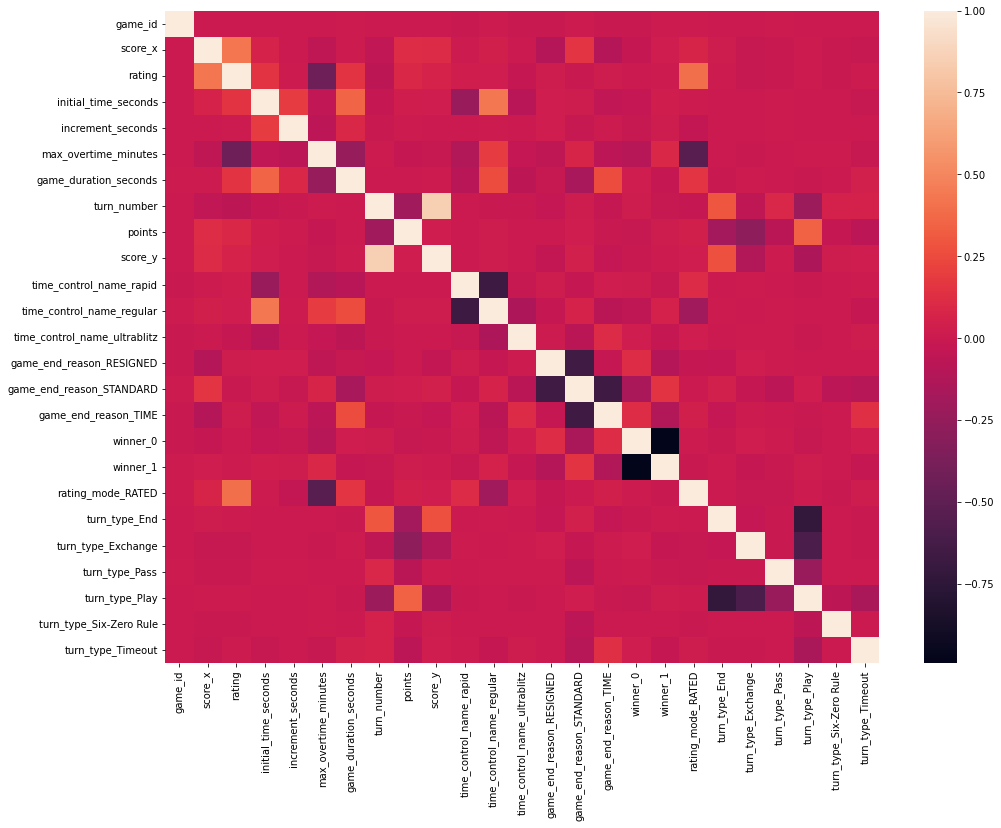

In [23]:
plt.figure(figsize=(16,12))
sns.heatmap(df_train_total.corr())

In [24]:
# df_train_total['rack'].

In [25]:
df_train_total.isnull().sum()

game_id                              0
nickname_x                           0
score_x                              0
rating                               0
first                                0
created_at                           0
lexicon                              0
initial_time_seconds                 0
increment_seconds                    0
max_overtime_minutes                 0
game_duration_seconds                0
turn_number                          0
nickname_y                           0
rack                             96414
location                        177060
move                               590
points                               0
score_y                              0
time_control_name_rapid              0
time_control_name_regular            0
time_control_name_ultrablitz         0
game_end_reason_RESIGNED             0
game_end_reason_STANDARD             0
game_end_reason_TIME                 0
winner_0                             0
winner_1                 

In [26]:
df_train_total=df_train_total.drop(['lexicon','rack','location','move','nickname_x','created_at','first'],axis=1)
df_train_total

,game_id,score_x,rating,initial_time_seconds,increment_seconds,max_overtime_minutes,game_duration_seconds,turn_number,nickname_y,points,...,game_end_reason_TIME,winner_0,winner_1,rating_mode_RATED,turn_type_End,turn_type_Exchange,turn_type_Pass,turn_type_Play,turn_type_Six-Zero Rule,turn_type_Timeout
0,1,335,1637,1200,0,1,674.844274,1,BetterBot,10,...,0,0,1,0,0,0,0,1,0,0
1,1,335,1637,1200,0,1,674.844274,2,stevy,18,...,0,0,1,0,0,0,0,1,0,0
2,1,335,1637,1200,0,1,674.844274,3,BetterBot,16,...,0,0,1,0,0,0,0,1,0,0
3,1,335,1637,1200,0,1,674.844274,4,stevy,16,...,0,0,1,0,0,0,0,1,0,0
4,1,335,1637,1200,0,1,674.844274,5,BetterBot,28,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2782573,72773,346,2302,1200,0,1,719.720262,22,adola,18,...,0,0,1,1,0,0,0,1,0,0
2782574,72773,346,2302,1200,0,1,719.720262,23,HastyBot,24,...,0,0,1,1,0,0,0,1,0,0
2782575,72773,346,2302,1200,0,1,719.720262,24,adola,7,...,0,0,1,1,0,0,0,1,0,0
2782576,72773,346,2302,1200,0,1,719.720262,25,HastyBot,11,...,0,0,1,1,0,0,0,1,0,0


In [27]:
df_train_total=df_train_total.drop(['nickname_y'],axis=1)
df_train_total

,game_id,score_x,rating,initial_time_seconds,increment_seconds,max_overtime_minutes,game_duration_seconds,turn_number,points,score_y,...,game_end_reason_TIME,winner_0,winner_1,rating_mode_RATED,turn_type_End,turn_type_Exchange,turn_type_Pass,turn_type_Play,turn_type_Six-Zero Rule,turn_type_Timeout
0,1,335,1637,1200,0,1,674.844274,1,10,10,...,0,0,1,0,0,0,0,1,0,0
1,1,335,1637,1200,0,1,674.844274,2,18,18,...,0,0,1,0,0,0,0,1,0,0
2,1,335,1637,1200,0,1,674.844274,3,16,26,...,0,0,1,0,0,0,0,1,0,0
3,1,335,1637,1200,0,1,674.844274,4,16,34,...,0,0,1,0,0,0,0,1,0,0
4,1,335,1637,1200,0,1,674.844274,5,28,54,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2782573,72773,346,2302,1200,0,1,719.720262,22,18,376,...,0,0,1,1,0,0,0,1,0,0
2782574,72773,346,2302,1200,0,1,719.720262,23,24,331,...,0,0,1,1,0,0,0,1,0,0
2782575,72773,346,2302,1200,0,1,719.720262,24,7,383,...,0,0,1,1,0,0,0,1,0,0
2782576,72773,346,2302,1200,0,1,719.720262,25,11,342,...,0,0,1,1,0,0,0,1,0,0


In [28]:
df_train_total.isnull().sum()

game_id                         0
score_x                         0
rating                          0
initial_time_seconds            0
increment_seconds               0
max_overtime_minutes            0
game_duration_seconds           0
turn_number                     0
points                          0
score_y                         0
time_control_name_rapid         0
time_control_name_regular       0
time_control_name_ultrablitz    0
game_end_reason_RESIGNED        0
game_end_reason_STANDARD        0
game_end_reason_TIME            0
winner_0                        0
winner_1                        0
rating_mode_RATED               0
turn_type_End                   0
turn_type_Exchange              0
turn_type_Pass                  0
turn_type_Play                  0
turn_type_Six-Zero Rule         0
turn_type_Timeout               0
dtype: int64

In [128]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV,train_test_split
import xgboost

xgmodel=xgboost.XGBRegressor(objective='reg:linear',n_estimators=10,seed=123)
X=df_train_total.drop('rating',axis=1)
y=df_train_total['rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

xgmodel.fit(X_train,y_train)

pred=xgmodel.predict(X_test)
pred

# from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

# print(classification_report(pred,y_test))
# print(confusion_matrix(pred,y_test))
# print(accuracy_score(pred,y_test))

[20:30:35] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.


array([1523.8314, 1703.9873, 1529.5762, ..., 1852.231 , 1956.5243,
       1900.4465], dtype=float32)

parameters={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]   
}
randomsearch=RandomizedSearchCV(model,param_distributions=parameters,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))


from datetime import datetime
start_time=timer(None)
randomsearch.fit(X,y)

timer(start_time)

randomsearch.best_estimator_

str(randomsearch.best_estimator_)

randomsearch.best_params_

tunedmodel=xgboost.XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.4,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0.1, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=4, max_leaves=0, min_child_weight=5,
             missing=np.nan, monotone_constraints='()', n_estimators=10, n_jobs=0,
             num_parallel_tree=1, objective='reg:linear', predictor='auto',
             random_state=123, reg_alpha=0)

tunedmodel=xgboost.XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.4,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.2, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.2, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=4, max_leaves=0, min_child_weight=7,
              missing=np.nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1)

tunedmodel.fit(X_train,y_train)


pred=model.predict(X_test)
pred

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
from sklearn.linear_model import LinearRegression
lmodel=LinearRegression()
lmodel.fit(X_train,y_train)
pred=lmodel.predict(X_test)

In [68]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
rmodel=Ridge()
parameters={'alpha':[1,2,5,10,20,30,40,50,60,70,80,90,100]}
cvrmodel=GridSearchCV(rmodel,parameters,scoring='neg_mean_squared_error',cv=5)
cvrmodel.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1, 2, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90,
                                   100]},
             scoring='neg_mean_squared_error')

In [69]:
cvrmodel.best_params_

{'alpha': 30}

In [70]:
cvrmodel.best_score_

-31682.335221963975

In [35]:
pred=cvrmodel.predict(X_test)

C:\Users\vijay\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

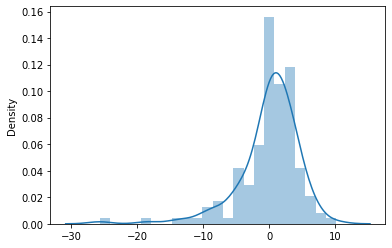

In [36]:
sns.distplot(pred-y_test)

In [37]:
r2_score(pred,y_test)

0.6468557055633647

In [130]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

lasmodel=Lasso()

parameters={'alpha':[1,2,5,10,20,30,40,50,60,70,80,90,100]}
cvlmodel=GridSearchCV(lasmodel,parameters,scoring='neg_mean_squared_error',cv=5)
cvlmodel.fit(X_train,y_train)

cvlmodel.best_params_

cvlmodel.best_score_

pred=cvlmodel.predict(X_test)

In [31]:
df_test_total.isnull().sum()

game_id                       0
nickname_x                    0
score_x                       0
rating                   614209
first                         0
time_control_name             0
game_end_reason               0
winner                        0
created_at                    0
lexicon                       0
initial_time_seconds          0
increment_seconds             0
rating_mode                   0
max_overtime_minutes          0
game_duration_seconds         0
turn_number                   0
nickname_y                    0
rack                      42366
location                  87418
move                        318
points                        0
score_y                       0
turn_type                   284
dtype: int64

In [32]:
df_test_total=df_test_total[df_test_total['rating'].isnull()==True]
df_test_total

,game_id,nickname_x,score_x,rating,first,time_control_name,game_end_reason,winner,created_at,lexicon,...,max_overtime_minutes,game_duration_seconds,turn_number,nickname_y,rack,location,move,points,score_y,turn_type
0,2,Super,488,NaN,Super,regular,STANDARD,1,2022-08-10 19:19:59,CSW21,...,1,364.214418,1,Super,AFINRTV,8D,FAINT,24,24,Play
1,2,Super,488,NaN,Super,regular,STANDARD,1,2022-08-10 19:19:59,CSW21,...,1,364.214418,2,BetterBot,EEEEGIT,G6,GE.IE,8,8,Play
2,2,Super,488,NaN,Super,regular,STANDARD,1,2022-08-10 19:19:59,CSW21,...,1,364.214418,3,Super,AAERTVW,F10,WAVER,34,58,Play
3,2,Super,488,NaN,Super,regular,STANDARD,1,2022-08-10 19:19:59,CSW21,...,1,364.214418,4,BetterBot,EEHNNOT,14B,ENTH.ONE,72,80,Play
4,2,Super,488,NaN,Super,regular,STANDARD,1,2022-08-10 19:19:59,CSW21,...,1,364.214418,5,Super,AABEFTY,15G,FY,44,102,Play
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1228413,72769,browndav,384,NaN,browndav,blitz,STANDARD,0,2022-09-07 13:24:13,CSW21,...,1,218.043751,27,browndav,OORTVWY,D2,VOW,32,367,Play
1228414,72769,browndav,384,NaN,browndav,blitz,STANDARD,0,2022-09-07 13:24:13,CSW21,...,1,218.043751,28,STEEBot,ACILSTZ,1A,ZILAS,56,626,Play
1228415,72769,browndav,384,NaN,browndav,blitz,STANDARD,0,2022-09-07 13:24:13,CSW21,...,1,218.043751,29,browndav,ORTY,B5,TYRO,19,386,Play
1228416,72769,browndav,384,NaN,browndav,blitz,STANDARD,0,2022-09-07 13:24:13,CSW21,...,1,218.043751,30,browndav,NaN,NaN,(CT),8,394,End


In [33]:
df_test_total=df_test_total.drop(['lexicon','rack','location','move','nickname_x','nickname_y','created_at','first'],axis=1)
df_test_total

,game_id,score_x,rating,time_control_name,game_end_reason,winner,initial_time_seconds,increment_seconds,rating_mode,max_overtime_minutes,game_duration_seconds,turn_number,points,score_y,turn_type
0,2,488,NaN,regular,STANDARD,1,3600,0,RATED,1,364.214418,1,24,24,Play
1,2,488,NaN,regular,STANDARD,1,3600,0,RATED,1,364.214418,2,8,8,Play
2,2,488,NaN,regular,STANDARD,1,3600,0,RATED,1,364.214418,3,34,58,Play
3,2,488,NaN,regular,STANDARD,1,3600,0,RATED,1,364.214418,4,72,80,Play
4,2,488,NaN,regular,STANDARD,1,3600,0,RATED,1,364.214418,5,44,102,Play
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1228413,72769,384,NaN,blitz,STANDARD,0,180,0,RATED,1,218.043751,27,32,367,Play
1228414,72769,384,NaN,blitz,STANDARD,0,180,0,RATED,1,218.043751,28,56,626,Play
1228415,72769,384,NaN,blitz,STANDARD,0,180,0,RATED,1,218.043751,29,19,386,Play
1228416,72769,384,NaN,blitz,STANDARD,0,180,0,RATED,1,218.043751,30,8,394,End


In [34]:
df_test_total.isnull().sum()

game_id                       0
score_x                       0
rating                   614209
time_control_name             0
game_end_reason               0
winner                        0
initial_time_seconds          0
increment_seconds             0
rating_mode                   0
max_overtime_minutes          0
game_duration_seconds         0
turn_number                   0
points                        0
score_y                       0
turn_type                   142
dtype: int64

In [35]:
df_test_total=pd.get_dummies(df_test_total,columns=['time_control_name','game_end_reason','winner','rating_mode','turn_type'],drop_first=True)

In [36]:
df_train_total.shape , df_test_total.shape

((2782578, 25), (614209, 25))

In [37]:
df_test_total.columns

Index(['game_id', 'score_x', 'rating', 'initial_time_seconds',
       'increment_seconds', 'max_overtime_minutes', 'game_duration_seconds',
       'turn_number', 'points', 'score_y', 'time_control_name_rapid',
       'time_control_name_regular', 'time_control_name_ultrablitz',
       'game_end_reason_RESIGNED', 'game_end_reason_STANDARD',
       'game_end_reason_TIME', 'winner_0', 'winner_1', 'rating_mode_RATED',
       'turn_type_End', 'turn_type_Exchange', 'turn_type_Pass',
       'turn_type_Play', 'turn_type_Six-Zero Rule', 'turn_type_Timeout'],
      dtype='object')

In [38]:
df_train_total.columns

Index(['game_id', 'score_x', 'rating', 'initial_time_seconds',
       'increment_seconds', 'max_overtime_minutes', 'game_duration_seconds',
       'turn_number', 'points', 'score_y', 'time_control_name_rapid',
       'time_control_name_regular', 'time_control_name_ultrablitz',
       'game_end_reason_RESIGNED', 'game_end_reason_STANDARD',
       'game_end_reason_TIME', 'winner_0', 'winner_1', 'rating_mode_RATED',
       'turn_type_End', 'turn_type_Exchange', 'turn_type_Pass',
       'turn_type_Play', 'turn_type_Six-Zero Rule', 'turn_type_Timeout'],
      dtype='object')

In [39]:
df_train_total.shape , df_test_total.shape

((2782578, 25), (614209, 25))

In [40]:
df_train_total.columns

Index(['game_id', 'score_x', 'rating', 'initial_time_seconds',
       'increment_seconds', 'max_overtime_minutes', 'game_duration_seconds',
       'turn_number', 'points', 'score_y', 'time_control_name_rapid',
       'time_control_name_regular', 'time_control_name_ultrablitz',
       'game_end_reason_RESIGNED', 'game_end_reason_STANDARD',
       'game_end_reason_TIME', 'winner_0', 'winner_1', 'rating_mode_RATED',
       'turn_type_End', 'turn_type_Exchange', 'turn_type_Pass',
       'turn_type_Play', 'turn_type_Six-Zero Rule', 'turn_type_Timeout'],
      dtype='object')

In [161]:
pred=xgmodel.predict(df_test_total.drop('rating',axis=1))
pred

array([1928.1371, 1920.8707, 1938.6066, ..., 1852.7922, 1847.2341,
       1852.7922], dtype=float32)

In [162]:
pred=pd.DataFrame(pred)
pred

,0
0,1928.137085
1,1920.870728
2,1938.606567
3,1938.606567
4,1938.606567
...,...
614204,1851.217407
614205,1865.100952
614206,1852.792236
614207,1847.234131


In [163]:
game_id=df_test_total['game_id']
game_id=pd.DataFrame(game_id)
game_id  # the default index is twice as we removed the rest of the null rating rows

,game_id
0,2
1,2
2,2
3,2
4,2
...,...
1228413,72769
1228414,72769
1228415,72769
1228416,72769


In [164]:
game_id=game_id.reset_index()
game_id

,index,game_id
0,0,2
1,1,2
2,2,2
3,3,2
4,4,2
...,...,...
614204,1228413,72769
614205,1228414,72769
614206,1228415,72769
614207,1228416,72769


In [165]:
gameid=game_id.reset_index()
gameid

,level_0,index,game_id
0,0,0,2
1,1,1,2
2,2,2,2
3,3,3,2
4,4,4,2
...,...,...,...
614204,614204,1228413,72769
614205,614205,1228414,72769
614206,614206,1228415,72769
614207,614207,1228416,72769


In [166]:
game_id.columns

Index(['index', 'game_id'], dtype='object')

In [167]:
game_id=game_id.drop('index',axis=1)

In [168]:
game_id

,game_id
0,2
1,2
2,2
3,2
4,2
...,...
614204,72769
614205,72769
614206,72769
614207,72769


In [169]:
pred=pred.reset_index()

In [170]:
pred

,index,0
0,0,1928.137085
1,1,1920.870728
2,2,1938.606567
3,3,1938.606567
4,4,1938.606567
...,...,...
614204,614204,1851.217407
614205,614205,1865.100952
614206,614206,1852.792236
614207,614207,1847.234131


In [171]:
ans=pd.concat([pred,game_id],axis=1)
ans

,index,0,game_id
0,0,1928.137085,2
1,1,1920.870728,2
2,2,1938.606567,2
3,3,1938.606567,2
4,4,1938.606567,2
...,...,...,...
614204,614204,1851.217407,72769
614205,614205,1865.100952,72769
614206,614206,1852.792236,72769
614207,614207,1847.234131,72769


In [172]:
ans=ans.drop(['index'],axis=1)
ans

,0,game_id
0,1928.137085,2
1,1920.870728,2
2,1938.606567,2
3,1938.606567,2
4,1938.606567,2
...,...,...
614204,1851.217407,72769
614205,1865.100952,72769
614206,1852.792236,72769
614207,1847.234131,72769


In [173]:
ans

,0,game_id
0,1928.137085,2
1,1920.870728,2
2,1938.606567,2
3,1938.606567,2
4,1938.606567,2
...,...,...
614204,1851.217407,72769
614205,1865.100952,72769
614206,1852.792236,72769
614207,1847.234131,72769


In [174]:
a=ans.columns

In [175]:
a=list(a)

In [176]:
a[1],a[0]=a[0],a[1]

In [177]:
ans=ans[a]
ans

,game_id,0
0,2,1928.137085
1,2,1920.870728
2,2,1938.606567
3,2,1938.606567
4,2,1938.606567
...,...,...
614204,72769,1851.217407
614205,72769,1865.100952
614206,72769,1852.792236
614207,72769,1847.234131


In [178]:
ans.columns=['game_id','rating']
ans

,game_id,rating
0,2,1928.137085
1,2,1920.870728
2,2,1938.606567
3,2,1938.606567
4,2,1938.606567
...,...,...
614204,72769,1851.217407
614205,72769,1865.100952
614206,72769,1852.792236
614207,72769,1847.234131


In [179]:
answer_mean=ans.groupby('game_id').mean()
answer_mean

,rating
game_id,
2,1932.748779
7,1878.209229
11,1785.146729
14,1838.852051
27,1953.535645
...,...
72760,1838.838867
72761,1562.470459
72762,1831.170044


In [180]:
answer_max=ans.groupby('game_id').max()
answer_max

,rating
game_id,
2,1950.743042
7,1899.284912
11,1794.109375
14,1843.443970
27,1972.270874
...,...
72760,1850.306641
72761,1581.163208
72762,1851.440552


In [181]:
answer=answer_mean.reset_index()

In [182]:
answer

,game_id,rating
0,2,1932.748779
1,7,1878.209229
2,11,1785.146729
3,14,1838.852051
4,27,1953.535645
...,...,...
22358,72760,1838.838867
22359,72761,1562.470459
22360,72762,1831.170044
22361,72768,1802.875977


In [183]:
answer.to_csv('submission.csv',index=False)

In [184]:
from sklearn import metrics
print('MAE:',metrics.mean_absolute_error(y_test,cvlmodel.predict(X_test)))
print('MSE:',metrics.mean_squared_error(y_test,cvlmodel.predict(X_test)))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,cvlmodel.predict(X_test))))

MAE: 142.85712512453162
MSE: 31863.330677997215
RMSE: 178.50302708356858


In [185]:
print('MAE:',metrics.mean_absolute_error(y_test,cvrmodel.predict(X_test)))
print('MSE:',metrics.mean_squared_error(y_test,cvrmodel.predict(X_test)))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,cvrmodel.predict(X_test))))

MAE: 141.98816082012036
MSE: 31689.866813517634
RMSE: 178.0164790504453


In [186]:
print('MAE:',metrics.mean_absolute_error(y_test,lmodel.predict(X_test)))
print('MSE:',metrics.mean_squared_error(y_test,lmodel.predict(X_test)))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,lmodel.predict(X_test))))

MAE: 141.987552720248
MSE: 31689.81427009094
RMSE: 178.01633147015175


In [187]:
print('MAE:',metrics.mean_absolute_error(y_test,xgmodel.predict(X_test)))
print('MSE:',metrics.mean_squared_error(y_test,xgmodel.predict(X_test)))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,xgmodel.predict(X_test))))

MAE: 133.36987247937952
MSE: 27434.60216401147
RMSE: 165.63394025383647


xg model is better  but  kaggles score based on RMSE is 188.06066 for both linear reg and xgboost reg